In [ ]:
# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import contextily as ctx

In [ ]:
points = pd.read_csv('C:/Users/shafeeq.mollagee/Aurecon Group/509233 WestCity SEZ - General/5 DEL DES/504 GIS/Taxi Ranks.csv')

In [ ]:
geometry = [Point(xy) for xy in zip(points['lon'], points['lat'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(points, crs=crs, geometry=geometry)

In [ ]:
gdf.head()

C:\Users\shafeeq.mollagee\Anaconda3\envs\gpandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


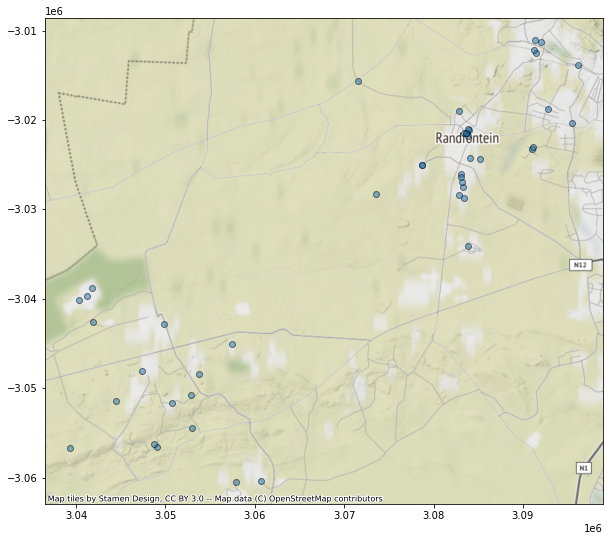

In [57]:
#Convert to web mercator
gdf = gdf.to_crs(epsg=3857)

# Add basemap
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [58]:
gdf.to_file('C:/Users/shafeeq.mollagee/Aurecon Group/509233 WestCity SEZ - General/5 DEL DES/504 GIS/Taxi Ranks.geojson', driver='GeoJSON')